[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakethagaddam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakethagaddam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakethagaddam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


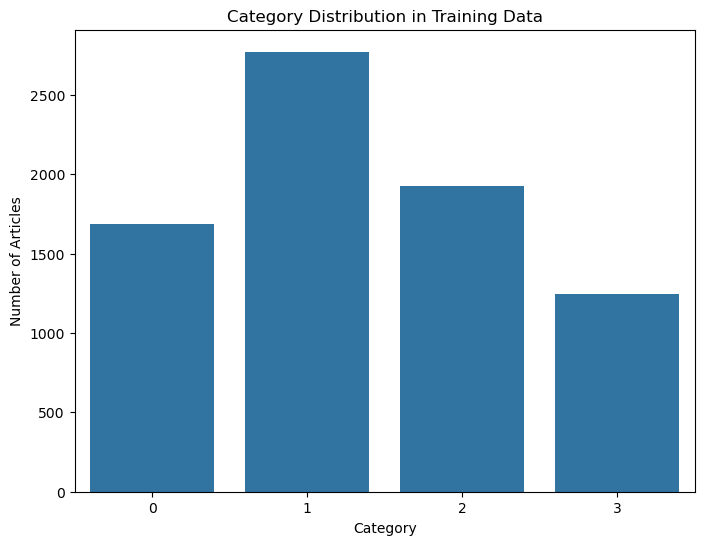


Most Common Words:
 [('said', 3707), ('also', 2627), ('year', 2143), ('party', 1983), ('new', 1943), ('india', 1904), ('election', 1783), ('congress', 1648), ('bjp', 1597), ('one', 1539)]


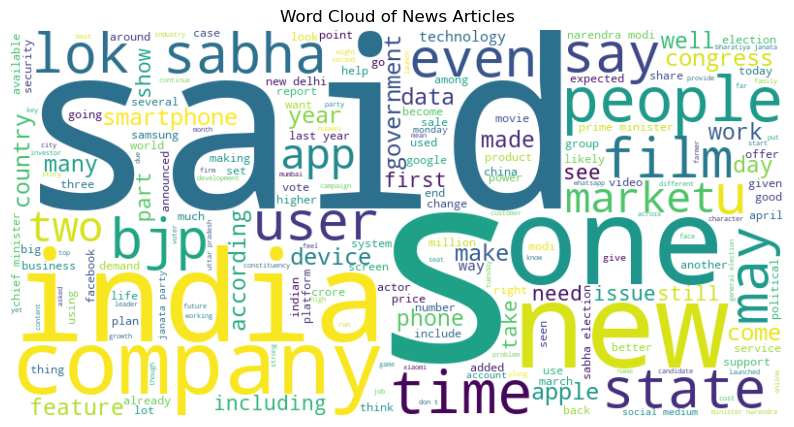


Average Sentence Length: 5.7417409543786055


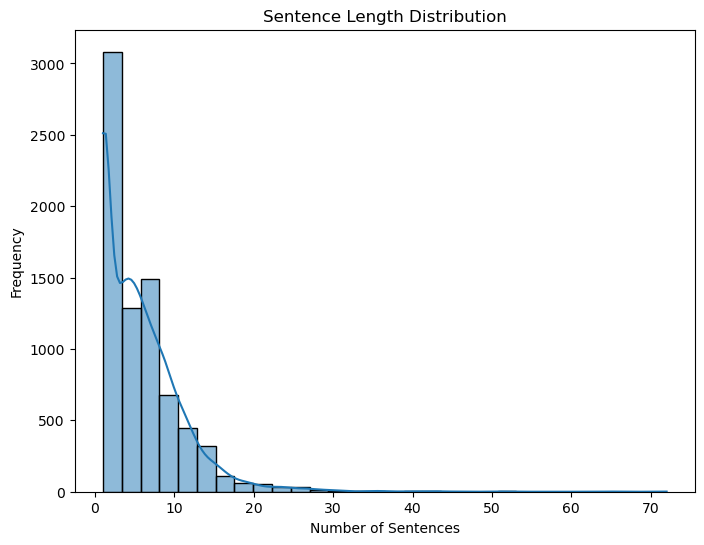


Logistic Regression Metrics:
Accuracy: 0.97
Precision (Weighted): 0.97
Recall (Weighted): 0.97
F1 Score (Weighted): 0.97

Confusion Matrix:
 [[485  10   9   2]
 [  2 810  12   8]
 [  5   4 568   0]
 [  2  12   2 358]]

Predictions saved to 'Test_Set_Predictions.csv'


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the training dataset
data = pd.read_csv("Data_Train.csv", encoding="ISO-8859-1")  # Replace with the actual dataset path

# Analysis: Distribution of Categories in Training Data
plt.figure(figsize=(8, 6))
sns.countplot(x=data['SECTION'])
plt.title("Category Distribution in Training Data")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

# Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return " ".join(tokens)

# Apply preprocessing to the STORY column
data['cleaned_story'] = data['STORY'].apply(preprocess_text)

# Most Common Words (Word Frequency Analysis)
from collections import Counter
all_words = " ".join(data['cleaned_story']).split()
common_words = Counter(all_words).most_common(10)
print("\nMost Common Words:\n", common_words)

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Articles")
plt.show()

# Sentence Length Distribution
data['sentence_length'] = data['STORY'].apply(lambda x: len(x.split('.')))
print("\nAverage Sentence Length:", data['sentence_length'].mean())
plt.figure(figsize=(8, 6))
sns.histplot(data['sentence_length'], kde=True, bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['cleaned_story'])  # Features
y = data['SECTION']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"Precision (Weighted): {precision_score(y_test, y_pred_logreg, average='weighted'):.2f}")
print(f"Recall (Weighted): {recall_score(y_test, y_pred_logreg, average='weighted'):.2f}")
print(f"F1 Score (Weighted): {f1_score(y_test, y_pred_logreg, average='weighted'):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))




# Save both models and vectorizer
import joblib
joblib.dump(logreg, "logistic_regression_model.pkl")
#joblib.dump(random_forest, "random_forest_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Load the test dataset
test_data = pd.read_csv("Data_Test.csv", encoding="ISO-8859-1")  # Replace with the actual test dataset path

# Preprocess and vectorize test data
test_data['cleaned_story'] = test_data['STORY'].apply(preprocess_text)
X_test_final = tfidf_vectorizer.transform(test_data['cleaned_story'])

# Make predictions on the test set using both models
y_test_pred_logreg = logreg.predict(X_test_final)
#y_test_pred_rf = random_forest.predict(X_test_final)

# Add predictions to the test dataset
test_data['Predicted_Section_LogReg'] = y_test_pred_logreg
#test_data['Predicted_Section_RF'] = y_test_pred_rf

# Save predictions to a CSV file
test_data.to_csv("Test_Set_Predictions.csv", index=False)
print("\nPredictions saved to 'Test_Set_Predictions.csv'")


In [9]:
# Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
 
 
 
# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision (Weighted): {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall (Weighted): {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1 Score (Weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
 
 
 
 
 
 
 
 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Train SVM with TF-IDF features
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
 
# Evaluate SVM
print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
 
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
 
# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_story'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_story'])
X_pad = pad_sequences(X_seq, maxlen=100)  # Padding/truncating to fixed length
 
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)
 
# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(len(y.unique()), activation='softmax'))  # Adjust for number of classes
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Train the LSTM
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))
 
# Evaluate LSTM
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLSTM Test Accuracy: {accuracy:.2f}")


Random Forest Metrics:
Accuracy: 0.95
Precision (Weighted): 0.95
Recall (Weighted): 0.95
F1 Score (Weighted): 0.95

Confusion Matrix:
 [[479  11  11   5]
 [  8 794  22   8]
 [ 16  11 547   3]
 [  7  13   6 348]]

SVM Metrics:
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       506
           1       0.98      0.97      0.98       832
           2       0.96      0.98      0.97       577
           3       0.97      0.97      0.97       374

    accuracy                           0.97      2289
   macro avg       0.97      0.97      0.97      2289
weighted avg       0.97      0.97      0.97      2289


Confusion Matrix:
 [[490   5   9   2]
 [  2 811  11   8]
 [  8   2 566   1]
 [  1  10   2 361]]
Epoch 1/5
167/167 [==============================] - 21s 121ms/step - loss: 0.6037 - accuracy: 0.7653 - val_loss: 0.1788 - val_accuracy: 0.9533
Epoch 2/5
167/167 [==============================] - 20s 

In [10]:
# Import necessary libraries
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Device configuration (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define custom Dataset class for BERT
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Load dataset
data = pd.read_csv("Data_Train.csv", encoding="ISO-8859-1")  # Update the path as needed

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Encode labels
label_encoder = LabelEncoder()
data['encoded_labels'] = label_encoder.fit_transform(data['SECTION'])

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['STORY'], data['encoded_labels'], test_size=0.3, random_state=42, stratify=data['SECTION']
)

# Create datasets
train_dataset = NewsDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len=128)
test_dataset = NewsDataset(test_texts.tolist(), test_labels.tolist(), tokenizer, max_len=128)

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(label_encoder.classes_)
)
model.to(device)

# Define DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Adjust batch size for CPU
test_loader = DataLoader(test_dataset, batch_size=8)

# Define optimizer and loss function
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
def train_model(model, train_loader, optimizer, loss_fn, device, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()

        accuracy = correct / len(train_loader.dataset)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

# Train the model
train_model(model, train_loader, optimizer, loss_fn, device)

# Evaluation loop
def evaluate_model(model, test_loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            correct += (preds == labels).sum().item()

    accuracy = correct / len(test_loader.dataset)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    print(f"Evaluation Metrics - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    return all_preds

# Evaluate the model
predictions = evaluate_model(model, test_loader, device)

# Save the model and tokenizer
model.save_pretrained("bert_model")
tokenizer.save_pretrained("bert_model")
print("\nBERT Model and Tokenizer saved.")

# Test dataset predictions
test_data = pd.read_csv("Data_Test.csv", encoding="ISO-8859-1")  # Update path as needed
test_dataset = NewsDataset(test_data['STORY'].tolist(), [0] * len(test_data), tokenizer, max_len=128)
test_loader = DataLoader(test_dataset, batch_size=8)

# Generate predictions on the test set
def predict_on_test_set(model, test_loader, device):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
    return all_preds

test_predictions = predict_on_test_set(model, test_loader, device)
test_data['Predicted_Section_BERT'] = test_predictions
test_data['Predicted_Section_BERT_Label'] = label_encoder.inverse_transform(test_predictions)

# Save predictions
test_data.to_csv("Test_Set_Predictions_With_BERT.csv", index=False)
print("\nPredictions with BERT saved to 'Test_Set_Predictions_With_BERT.csv'")


Using device: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 108.2369, Accuracy: 0.9558
Epoch 2/3, Loss: 49.9125, Accuracy: 0.9794
Epoch 3/3, Loss: 33.5855, Accuracy: 0.9871
Evaluation Metrics - Accuracy: 0.9790, Precision: 0.9791, Recall: 0.9790, F1 Score: 0.9790

BERT Model and Tokenizer saved.

Predictions with BERT saved to 'Test_Set_Predictions_With_BERT.csv'


In [11]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pre-trained BERT model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Adjust 'num_labels' as needed

# Save the pre-trained model and tokenizer
pretrained_model_dir = "pretrained_bert_model"
model.save_pretrained(pretrained_model_dir)
tokenizer.save_pretrained(pretrained_model_dir)

print(f"Pre-trained BERT model and tokenizer saved to: {pretrained_model_dir}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Pre-trained BERT model and tokenizer saved to: pretrained_bert_model
